# Projeto de conclusão de Módulo Machine Learning II
## Integrantes:
#### Assuero Meira
#### Leandro Republicano
#### Leticia da Luz
#### Orestes Dos Santos
---
## Objetivos do Projeto:
- Com o conhecimento adquirido em análise e ciência de dados até o momento, este projeto tem como finalidade avaliar um dataset sob três perspectivas:
  - **Análise Exploratória de Dados (EDA):** Entender a estrutura, as características e as tendências presentes nos dados.
  - **Análise de Segmentação:** Agrupar os dados em segmentos significativos para identificar padrões e comportamentos específicos.
  - **Análise Preditiva:** Desenvolver um modelo preditivo para antecipar eventos ou comportamentos futuros.

---

## Dataset: Internet Service Provider Customer Churn

**Link:** https://www.kaggle.com/datasets/mehmetsabrikunt/internet-service-churn/data

**Resumo:**
- **Contexto:** Existe uma grande competição entre os provedores de internet. Para aumentar a receita, os provedores precisam de mais assinantes, mas manter os clientes existentes é mais crucial do que conseguir novos. Assim, os provedores querem saber quais clientes têm maior probabilidade de cancelar o serviço, um fenômeno conhecido como churn. Se souberem quem está prestes a cancelar, podem tentar retê-los com promoções ou ofertas especiais.
- **Conteúdo:** Este dataset contém dados de clientes que usam serviços de internet e indica se o cliente cancelou o serviço (churn) ou não.
---
## Desta forma, para este projeto visamos:
- **Previsão de Churn:** Criar um modelo capaz de prever quando um cliente está prestes a cancelar seu serviço.
- **Segmentação de Clientes:** Agrupar clientes que cancelaram o serviço usando técnicas de clusterização. Ao identificar grupos de clientes com características e comportamentos semelhantes, é possível desenvolver estratégias de marketing específicas para reter esses clientes.

## 3 - Aprendizado de máquina não supervisionado (clusterização):

In [ ]:
#Importação de bibliotecas
import pandas as pd
import numpy as np

In [ ]:
# Montando o Google Drive no ambiente do Colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Caminho do arquivo
caminho_csv = '/content/drive/MyDrive/projeto_ML/projeto_ML_2/df_churn_cleaned.csv'

In [ ]:
# Carregando o arquivo CSV usando Pandas
df_churn_cluster = pd.read_csv(caminho_csv)

In [ ]:
df_churn_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71892 entries, 0 to 71891
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_tv_subscriber             71892 non-null  int64  
 1   is_movie_package_subscriber  71892 non-null  int64  
 2   subscription_age             71892 non-null  float64
 3   bill_avg                     71892 non-null  int64  
 4   reamining_contract           71892 non-null  float64
 5   service_failure_count        71892 non-null  int64  
 6   download_avg                 71892 non-null  float64
 7   upload_avg                   71892 non-null  float64
 8   download_over_limit          71892 non-null  int64  
 9   churn                        71892 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 5.5 MB


In [ ]:
df_churn_cluster.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,0,0,8.22,0,0.00,0,0.0,0.0,0,1
2,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,0,0,6.87,21,0.00,1,0.0,0.0,0,1
4,0,0,6.39,0,0.00,0,0.0,0.0,0,1


In [ ]:
df_churn_cluster.describe()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,71892.000000,71892.000000,71892.00000,71892.000000,71892.000000,71892.000000,71892.000000,71892.000000,71892.000000,71892.000000
mean,0.815237,0.334071,2.45552,19.017109,0.497618,0.275677,43.690066,4.192116,0.208716,0.557072
std,0.388108,0.471668,2.02685,13.188442,0.665758,0.818539,63.406391,9.818959,0.999654,0.496736
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.94000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,1.000000,0.000000,1.98000,19.000000,0.000000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.000000,1.000000,3.30000,22.000000,1.030000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.000000,1.000000,12.80000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


### Para identificar grupos entre os clientes que cancelaram o serviço e compreender melhor seus padrões, vamos filtrar o dataset para incluir apenas esses clientes.

In [ ]:
#Filtrando o dataset
df_churn_cluster = df_churn_cluster[df_churn_cluster['churn'] == 1]

In [ ]:
df_churn_cluster.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
1,0,0,8.22,0,0.0,0,0.0,0.0,0,1
2,1,0,8.91,16,0.0,0,13.7,0.9,0,1
3,0,0,6.87,21,0.0,1,0.0,0.0,0,1
4,0,0,6.39,0,0.0,0,0.0,0.0,0,1
6,0,0,8.96,18,0.0,0,21.3,2.0,0,1


In [ ]:
df_churn_cluster.shape

(40049, 10)

## K-means
- O K-Means é projetado para minimizar a soma das distâncias quadradas entre os pontos de dados e os centróides dos clusters. Esta abordagem torna o K-Means particularmente sensível a outliers;
- Um outlier pode puxar o centróide de um cluster na sua direção, afastando-o dos outros pontos do cluster. Isso pode resultar em centróides que não representam bem a distribuição real dos dados.
- Outliers podem formar seu próprio cluster separado. Isso ocorre porque os outliers são muito diferentes do restante dos dados, e o K-Means pode acabar atribuindo um ou mais centróides a esses pontos extremos. Isso é ineficiente, pois geralmente estamos mais interessados em clusters representativos dos dados principais.
- Outliers podem causar a fusão de clusters que deveriam ser distintos. Como os centróides são deslocados na direção dos outliers, os pontos de dados podem ser incorretamente agrupados juntos. Isso pode resultar em clusters que se sobrepõem ou que são mal definidos, diminuindo a eficiência e a qualidade do agrupamento.

- **Desta forma, para o K-means vamos optar pela remoção dos outliers**

In [ ]:
# Lista de colunas que vamos remover os outliers
columns_to_clean = ['subscription_age', 'bill_avg', 'download_avg', 'upload_avg']

In [ ]:
def remove_outliers(df, columns):
  for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df

In [ ]:
df_churn_cluster_cleaned = remove_outliers(df_churn_cluster, columns_to_clean)

In [ ]:
df_churn_cluster_cleaned['churn'].value_counts()

churn
1    32304
Name: count, dtype: int64

In [ ]:
# Primeiro vamos padronizar todas as variáveis
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_out= scaler.fit_transform(df_churn_cluster_cleaned)

In [ ]:
X_out

array([[-1.47589846, -0.47554641,  2.64080322, ..., -0.82345578,
        -0.2941786 ,  0.        ],
       [-1.47589846, -0.47554641,  2.67854397, ..., -0.82345578,
        -0.2941786 ,  0.        ],
       [-1.47589846, -0.47554641,  2.43700314, ..., -0.82345578,
        -0.2941786 ,  0.        ],
       ...,
       [ 0.67755339, -0.47554641, -1.48048718, ..., -0.67587829,
        -0.2941786 ,  0.        ],
       [-1.47589846, -0.47554641, -1.48803533, ..., -0.82345578,
        -0.2941786 ,  0.        ],
       [ 0.67755339,  2.10284419, -1.48803533, ..., -0.82345578,
        -0.2941786 ,  0.        ]])

In [ ]:
X_out.shape

(32304, 10)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Lista de valores de k a serem testados
k_values = range(2, 20)

# Inicializando listas para armazenar inércias e silhuetas
inertias = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init = 'k-means++', n_init='auto', random_state=42)
    kmeans.fit(X_out)
    inertias.append(kmeans.inertia_)

    # Calcular a pontuação da silhueta
    cluster_labels = kmeans.predict(X_out)
    silhouette_avg = silhouette_score(X_out, cluster_labels)
    silhouette_scores.append(silhouette_avg)

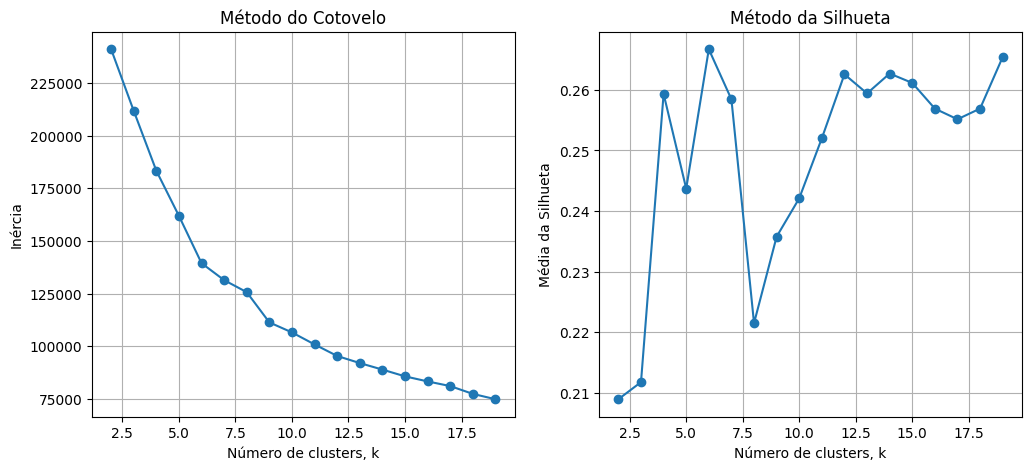

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plotando a inércia em função de k
ax1.plot(k_values, inertias, marker='o')
ax1.set_title('Método do Cotovelo')
ax1.set_xlabel('Número de clusters, k')
ax1.set_ylabel('Inércia')
ax1.grid(True)

# Plotando o método da silhueta
ax2.plot(k_values, silhouette_scores, marker='o')
ax2.set_title('Método da Silhueta')
ax2.set_xlabel('Número de clusters, k')
ax2.set_ylabel('Média da Silhueta')
ax2.grid(True)

# Exibindo os gráficos
plt.show()

## A média máxima da silhueta está situada no cluster 6

In [ ]:
# Ajustando o modelo K-means com k=6
kmeans = KMeans(n_clusters=6, init='k-means++', n_init='auto', max_iter = 300)

In [ ]:
# Prevendo os clusters
kmeans_labels = kmeans.fit_predict(X_out)
kmeans_labels.shape

(32304,)

In [ ]:
# Calcular o Silhouette Score para KMeans
kmeans_silhouette = silhouette_score(X_out, kmeans_labels)
print(f'Silhouette Score para KMeans: {kmeans_silhouette:.4f}')

Silhouette Score para KMeans: 0.2492


In [ ]:
# Adicionando uma nova coluna 'cluster' ao DataFrame original com os rótulos dos clusters
df_churn_cluster_cleaned['cluster'] = kmeans_labels

In [ ]:
df_churn_cluster_cleaned.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,cluster
7,0,0,5.48,14,0.0,1,0.0,0.0,0,1,3
13,0,0,5.53,14,0.0,0,0.0,0.0,0,1,3
25,0,0,5.21,14,0.0,0,0.0,0.0,0,1,3
31,0,0,5.62,0,0.0,0,0.0,0.0,0,1,3
35,0,0,5.44,18,0.0,0,0.0,0.0,0,1,3


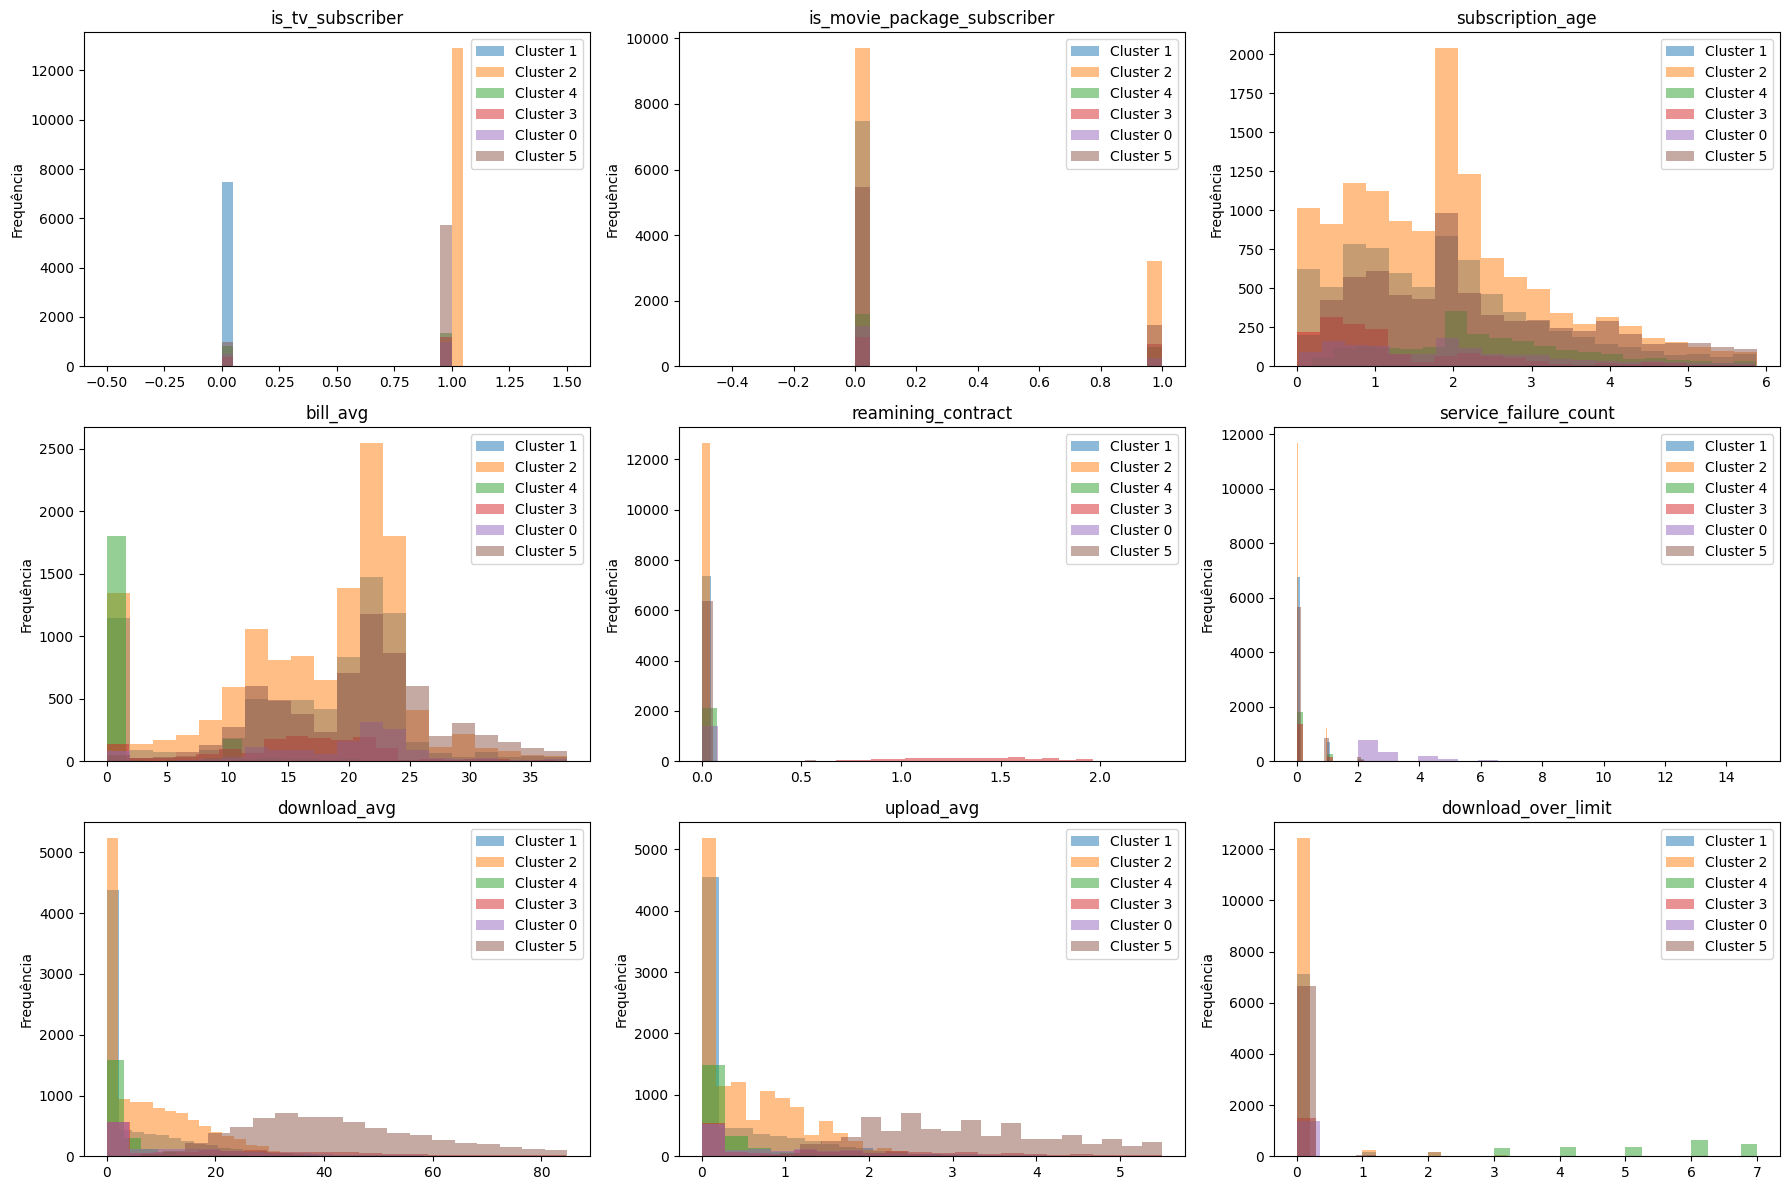

In [ ]:
# Variáveis
variables = [col for col in df_churn_cluster_cleaned.columns if col != 'cluster' and col != 'churn']

# Número de colunas e linhas para a grade de subplots
cols = 3
rows = 3
fig, axs = plt.subplots(rows, cols, figsize=(18, 12))
axs = axs.flatten()

# Plotando cada variável em um subplot
for i, var in enumerate(variables):
    for cluster in df_churn_cluster_cleaned['cluster'].unique():
        subset = df_churn_cluster_cleaned[df_churn_cluster_cleaned['cluster'] == cluster]
        axs[i].hist(subset[var], bins=20, alpha=0.5, label=f'Cluster {cluster}')
    axs[i].set_title(var)
    axs[i].set_ylabel('Frequência')
    axs[i].legend()

plt.tight_layout()
plt.show()

<ipython-input-25-f011619035a4>:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_churn_cluster_cleaned, x=column, hue='cluster', palette='colorblind', fill=True, ax=axs[i])
<ipython-input-25-f011619035a4>:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_churn_cluster_cleaned, x=column, hue='cluster', palette='colorblind', fill=True, ax=axs[i])


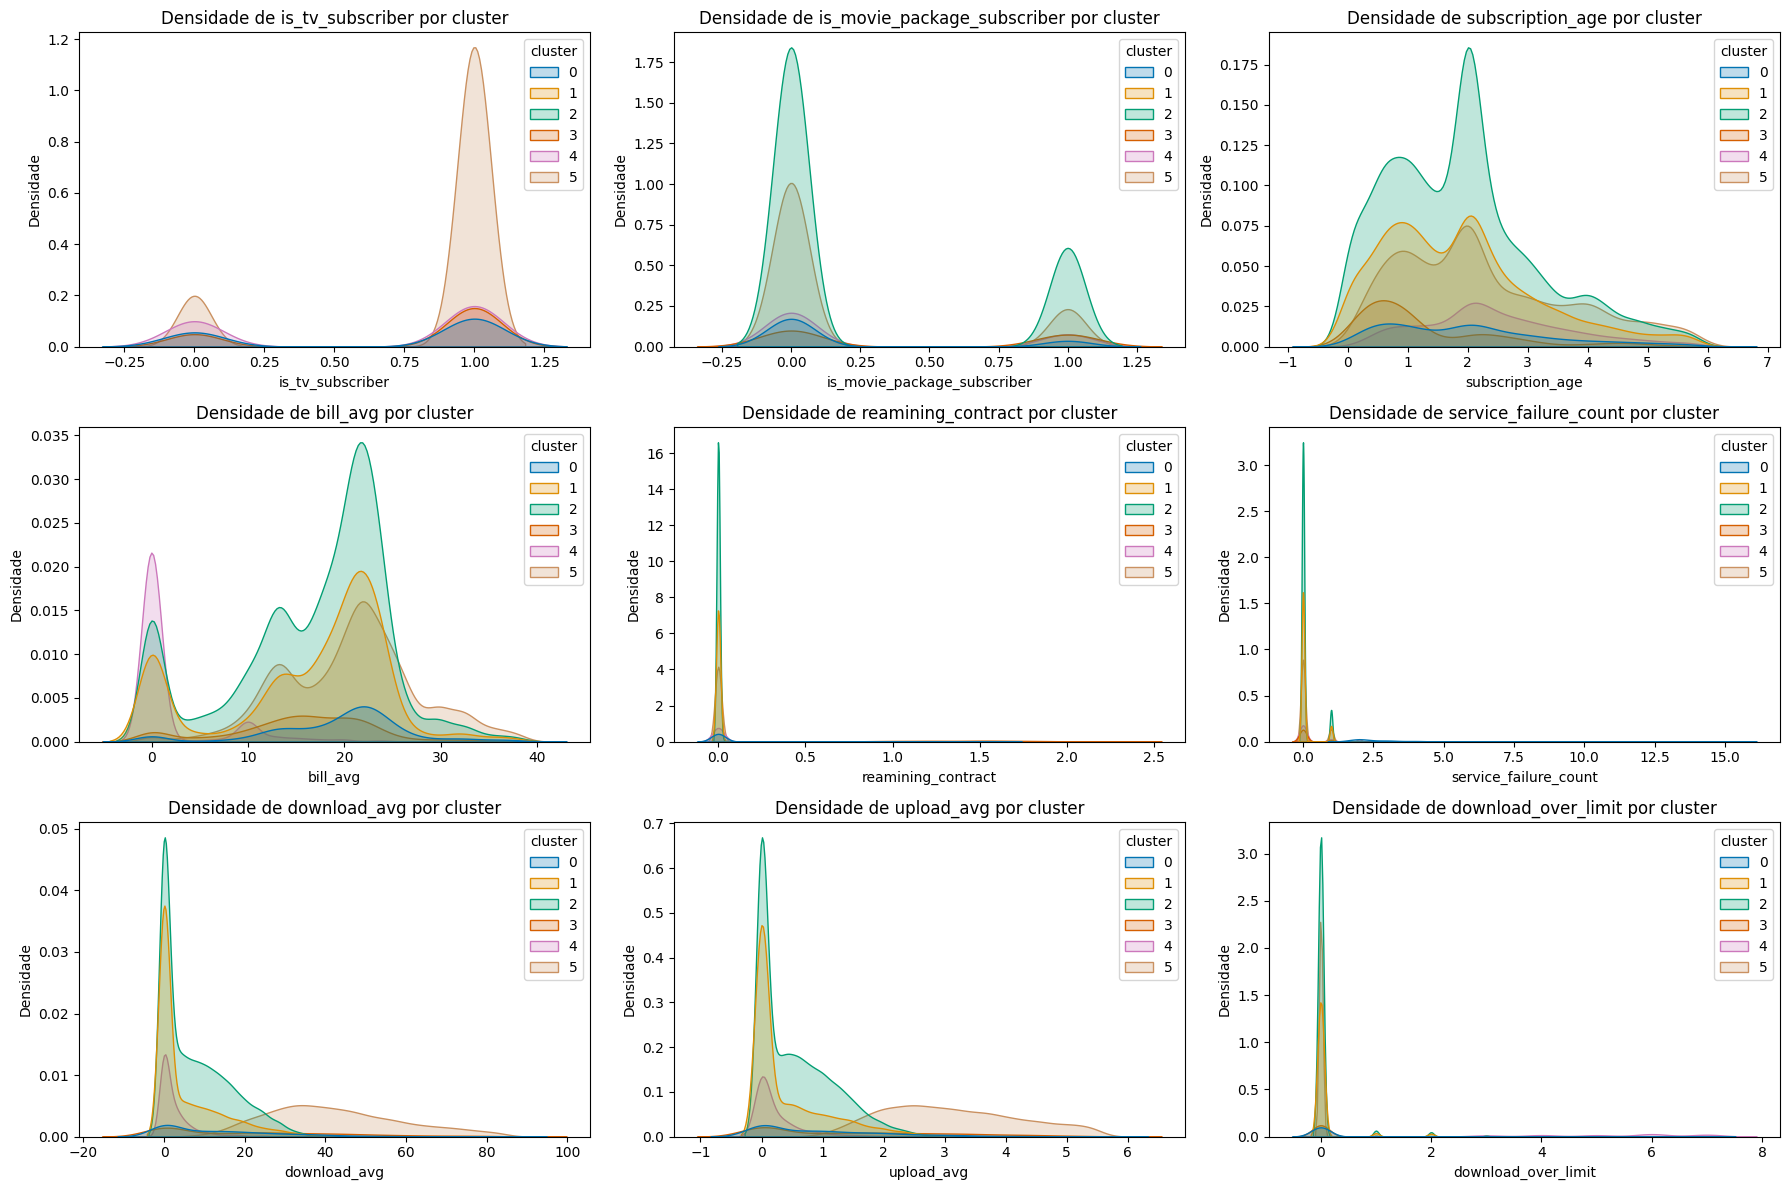

In [ ]:
import seaborn as sns

# Número de colunas e linhas para a grade de subplots
cols = 3
rows = 3
fig, axs = plt.subplots(rows, cols, figsize=(18, 12))
axs = axs.flatten()

# Plotando cada variável em um subplot
for i, column in enumerate(variables):
    sns.kdeplot(data=df_churn_cluster_cleaned, x=column, hue='cluster', palette='colorblind', fill=True, ax=axs[i])
    axs[i].set_title(f'Densidade de {column} por cluster')
    axs[i].set_ylabel('Densidade')

plt.tight_layout()
plt.show()

## DBSCAN
- DBSCAN (Density-Based Spatial Clustering of Applications with Noise) pode ser mais vantajoso que K-means em várias situações:
  - Pode identificar clusters de formas arbitrárias, incluindo clusters de formas não convexas. Isso ocorre porque DBSCAN agrupa pontos com base na densidade local, permitindo a formação de clusters em qualquer forma.
  -  **Naturalmente robusto ao ruído e outliers. Ele classifica pontos que não pertencem a nenhum cluster denso como 'ruído', desta forma, é menos sensível a outliers.**
  - Não requer a especificação do número de clusters antecipadamente. O algoritmo descobre automaticamente o número de clusters baseado na densidade dos dados.

- Como ele é menos sensível a outliers vamos utilizar o conjunto de dados completo.

In [ ]:
# Primeiro vamos padronizar todas as variáveis
X = scaler.fit_transform(df_churn_cluster)

In [ ]:
X.shape

(40049, 10)

In [ ]:
X

array([[-1.53205068, -0.50721547,  3.50613369, ..., -0.34892211,
        -0.27060074,  0.        ],
       [ 0.65271992, -0.50721547,  3.90978373, ..., -0.23546112,
        -0.27060074,  0.        ],
       [-1.53205068, -0.50721547,  2.71638362, ..., -0.34892211,
        -0.27060074,  0.        ],
       ...,
       [ 0.65271992, -0.50721547, -1.29086677, ..., -0.32370856,
        -0.27060074,  0.        ],
       [-1.53205068, -0.50721547, -1.29671677, ..., -0.34892211,
        -0.27060074,  0.        ],
       [ 0.65271992,  1.9715487 , -1.29671677, ..., -0.34892211,
        -0.27060074,  0.        ]])

In [ ]:
from sklearn.cluster import DBSCAN

# Lista de valores de eps a serem testados
eps_values = np.arange(0.1, 2.0, 0.2)

# Inicializando listas para armazenar silhuetas
silhouette_scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    cluster_labels = dbscan.fit_predict(X)

    # Verifica se há mais de um cluster
    silhouette_avg = silhouette_score(X, cluster_labels) if len(set(cluster_labels)) > 1 else -1
    silhouette_scores.append(silhouette_avg)

# Encontrar o melhor eps baseado na pontuação da silhueta
best_eps = eps_values[np.argmax(silhouette_scores)]
best_silhouette = max(silhouette_scores)

# Imprimir os melhores parâmetros
print(f'Melhor eps: {best_eps:.4f}')
print(f'Melhor Silhouette Score: {best_silhouette:.4f}')

Melhor eps: 1.9000
Melhor Silhouette Score: 0.2667


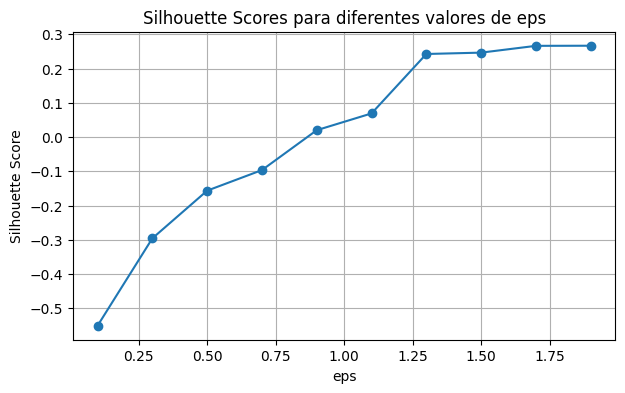

In [ ]:
# Plotar os resultados das pontuações da silhueta
plt.figure(figsize=(7, 4))
plt.plot(eps_values, silhouette_scores, marker='o')
plt.xlabel('eps')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores para diferentes valores de eps')
plt.grid(True)
plt.show()

In [ ]:
# Aplicar DBSCAN com o melhor eps
dbscan = DBSCAN(eps=best_eps, min_samples=5)
cluster_labels = dbscan.fit_predict(X)

# Contar o número de clusters, excluindo ruídos
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f'Número estimado de clusters: {n_clusters}')


Número estimado de clusters: 3


In [ ]:
# Aplicando DBSCAN
dbscan = DBSCAN(eps=best_eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

In [ ]:
# Calcular o Silhouette Score para DBSCAN
dbscan_silhouette = silhouette_score(X, dbscan_labels)
print(f'Silhouette Score para DBSCAN: {dbscan_silhouette:.4f}')

Silhouette Score para DBSCAN: 0.2667


In [ ]:
#Adicionando uma coluna com os clusters do dbscan no dataset com outliers
df_churn_cluster['dbscan_cluster'] = dbscan_labels

In [ ]:
df_churn_cluster.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn,dbscan_cluster
1,0,0,8.22,0,0.0,0,0.0,0.0,0,1,0
2,1,0,8.91,16,0.0,0,13.7,0.9,0,1,1
3,0,0,6.87,21,0.0,1,0.0,0.0,0,1,0
4,0,0,6.39,0,0.0,0,0.0,0.0,0,1,0
6,0,0,8.96,18,0.0,0,21.3,2.0,0,1,0


In [ ]:
#Variáveis para plotar (excluindo a coluna 'dbscan_cluster')
variables = [col for col in df_churn_cluster.columns if col != 'dbscan_cluster' and col != 'churn']

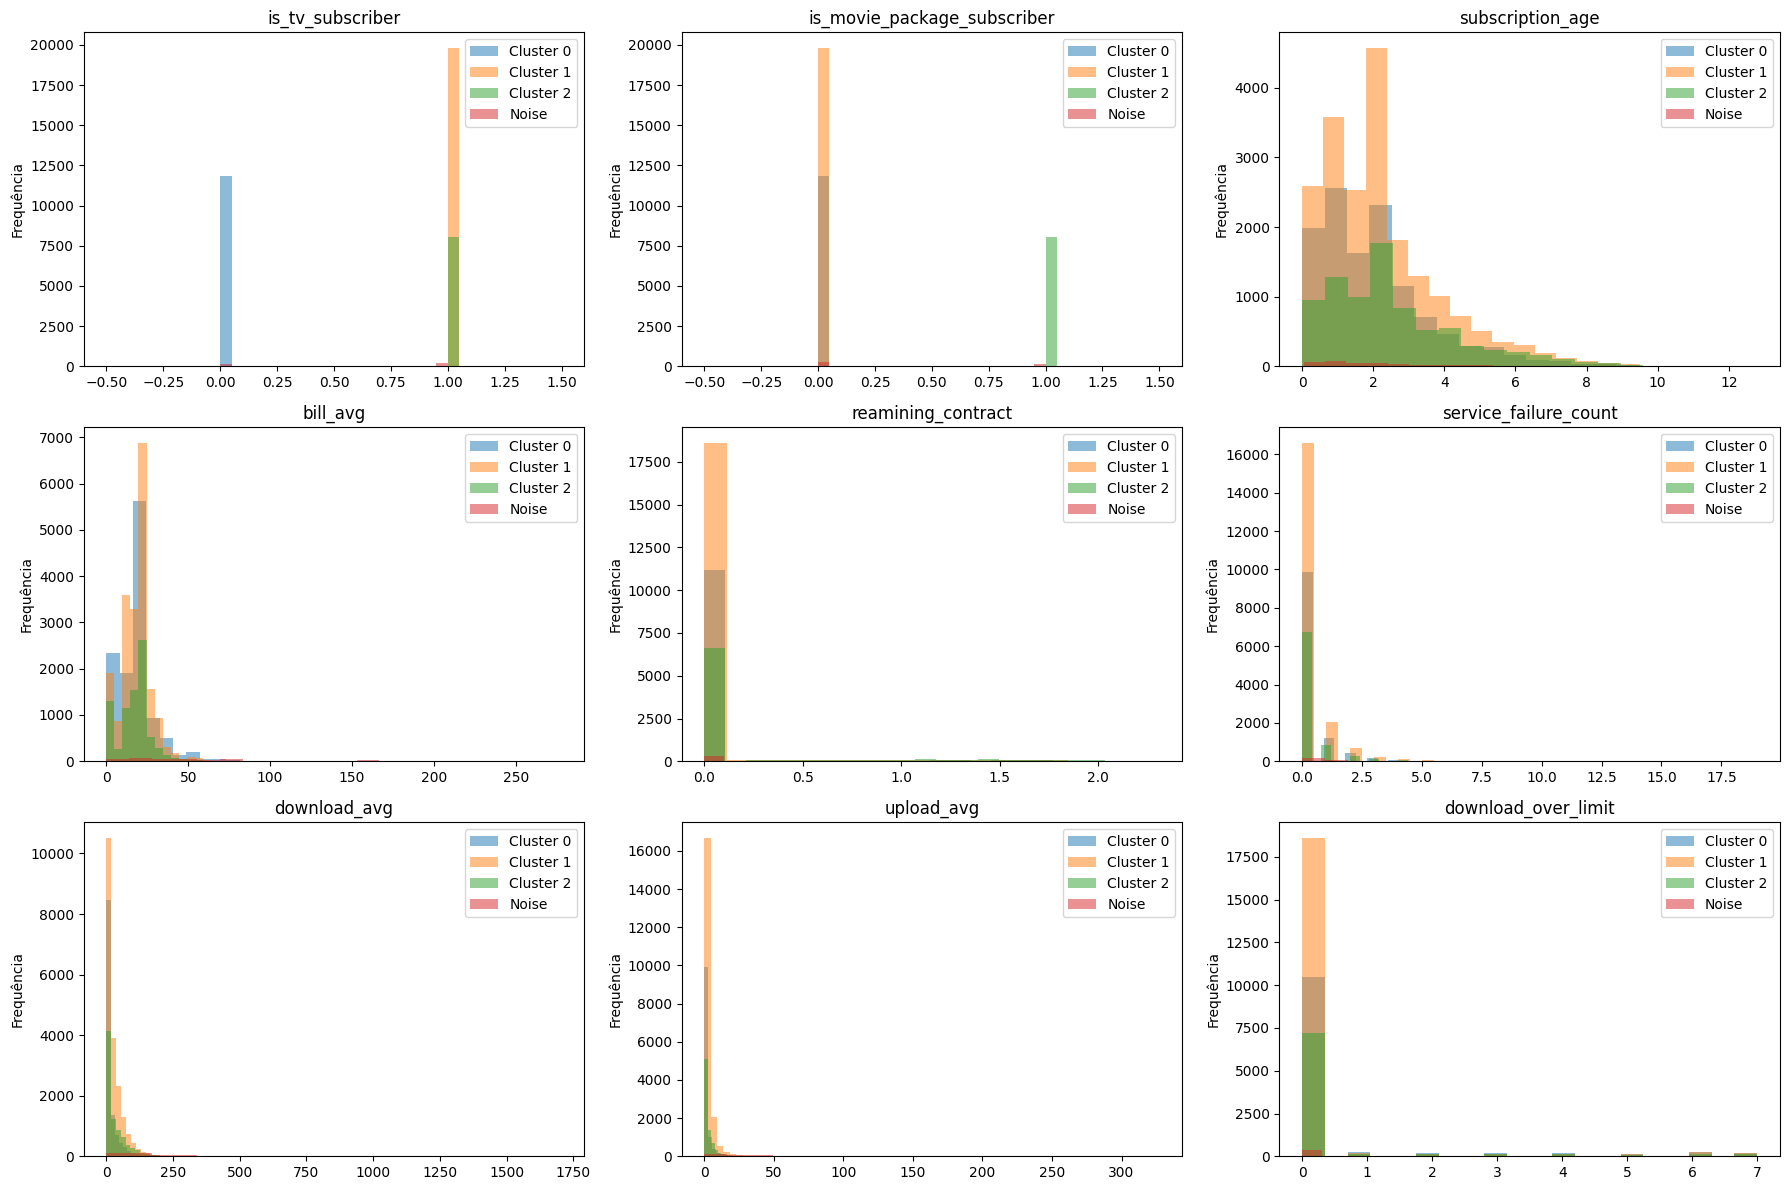

In [ ]:
# Número de colunas e linhas para a grade de subplots
cols = 3
rows = 3
fig, axs = plt.subplots(rows, cols, figsize=(18, 12))
axs = axs.flatten()

# Plotando cada variável em um subplot
for i, var in enumerate(variables):
    for cluster in set(dbscan_labels):
        subset = df_churn_cluster[df_churn_cluster['dbscan_cluster'] == cluster]
        axs[i].hist(subset[var], bins=20, alpha=0.5, label=f'Cluster {cluster}' if cluster != -1 else 'Noise')
    axs[i].set_title(var)
    axs[i].set_ylabel('Frequência')
    axs[i].legend()

plt.tight_layout()
plt.show()

<ipython-input-111-40c3e5299e1a>:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_churn_cluster, x=column, hue='dbscan_cluster', palette='colorblind', fill=True, ax=axs[i])
<ipython-input-111-40c3e5299e1a>:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_churn_cluster, x=column, hue='dbscan_cluster', palette='colorblind', fill=True, ax=axs[i])


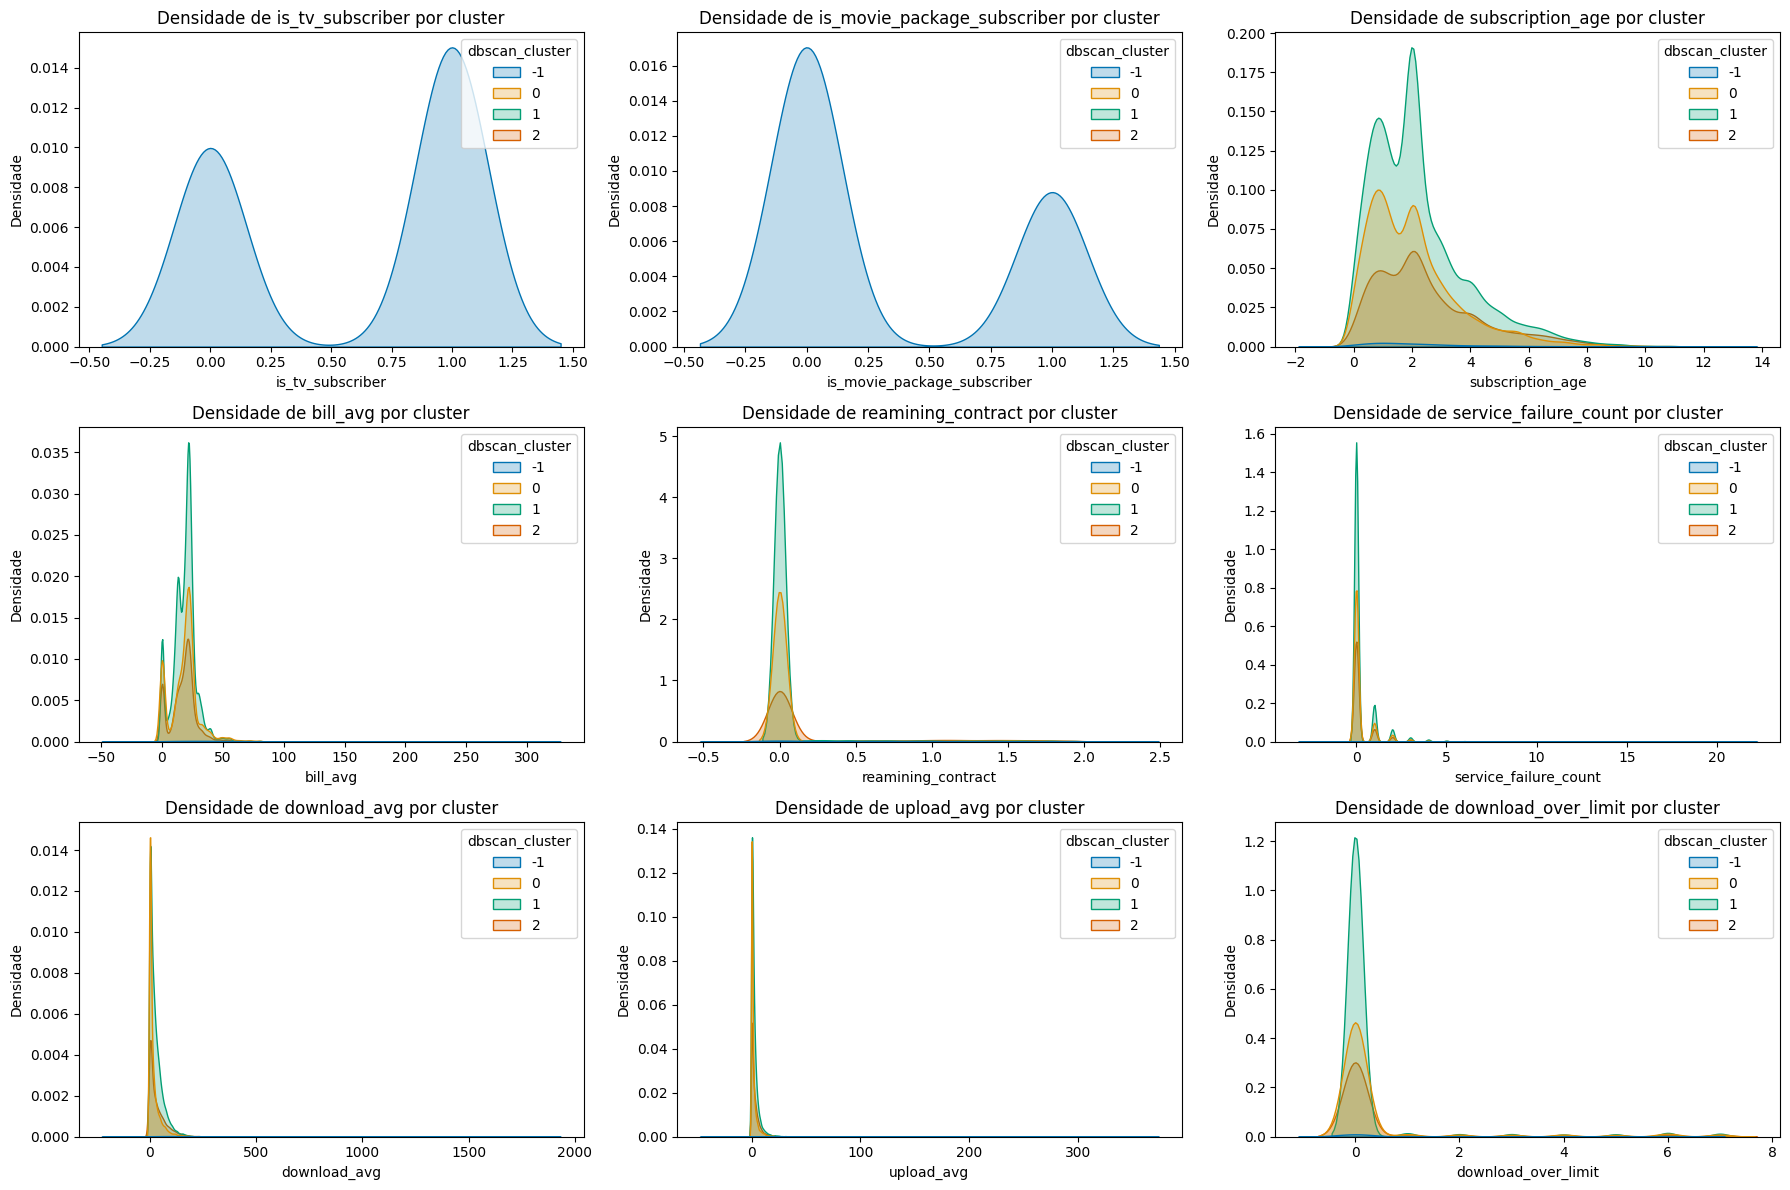

In [ ]:
# Número de colunas e linhas para a grade de subplots
cols = 3
rows = 3
fig, axs = plt.subplots(rows, cols, figsize=(18, 12))
axs = axs.flatten()

# Plotando cada variável em um subplot
for i, column in enumerate(variables):
    sns.kdeplot(data=df_churn_cluster, x=column, hue='dbscan_cluster', palette='colorblind', fill=True, ax=axs[i])
    axs[i].set_title(f'Densidade de {column} por cluster')
    axs[i].set_ylabel('Densidade')

plt.tight_layout()
plt.show()

## Comparação
- Devido ao tamanho do nosso dataset, com cerca de 30 mil linhas, a eficiência computacional pesou na escolha do algoritmo de clusterização. Optamos pelo K-Means, pois ele tem um tempo de processamento menor.
- Além disso, tanto o K-Means quanto o DBSCAN apresentaram escores de silhueta semelhantes, indicando desempenho similar na definição dos clusters.
- No entanto, o K-Means identificou um número maior de clusters, sugerindo que ele conseguiu capturar uma maior complexidade nos dados. Com base nisso, decidimos escolher o K-Means como nosso modelo de clusterização, pois ele não apenas é computacionalmente mais eficiente, mas também oferece uma segmentação mais detalhada dos dados, o que sugere uma maior capacidade de identificar uma segmentação mais precisa e detalhada..




## Colunas 'is_tv_subscriber'

In [ ]:
# Contagem de assinantes (1) e não-assinantes (0) por cluster
df_churn_cluster_cleaned.groupby('cluster')['is_tv_subscriber'].value_counts().unstack()

is_tv_subscriber,0,1
cluster,,
0,495.0,972.0
1,7470.0,NaN
2,NaN,12899.0
3,387.0,1199.0
4,840.0,1340.0
5,972.0,5730.0


In [ ]:
# Porcentagem de assinantes de TV por cluster
porc_tv_subscribers = df_churn_cluster_cleaned.groupby('cluster')['is_tv_subscriber'].mean() *100
pd.DataFrame(porc_tv_subscribers)

,is_tv_subscriber
cluster,
0,66.257669
1,0.000000
2,100.000000
3,75.598991
4,61.467890
5,85.496867


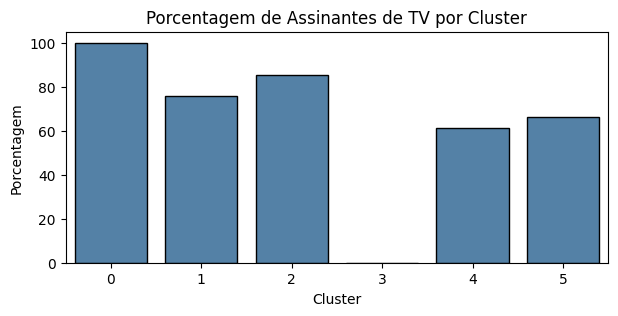

In [ ]:
# Porcentagem de assinantes de TV por cluster
plt.figure(figsize=(7, 3))
sns.barplot(x=porc_tv_subscribers.index, y=porc_tv_subscribers.values, color = '#4682B4', edgecolor = 'k')
plt.xlabel('Cluster')
plt.ylabel('Porcentagem')
plt.title('Porcentagem de Assinantes de TV por Cluster')
plt.show()

## Padrões em cada cluster:
- Clusters 0 e 2: Esses grupos valorizam muito o serviço de TV. Podemos considerar ofertas personalizadas para assinantes de TV, como descontos em pacotes e promoções para prevenir churn. Isso pode incluir contratos de longo prazo com benefícios adicionais relacionados ao serviço de TV, como acesso a mais canais, descontos em pacotes futuros, ou bônus por fidelidade.

- Cluster 3: Este grupo não valoriza o serviço de TV. Pode ser mais eficaz focar em outros serviços que esses clientes utilizam, como internet de alta velocidade, pacotes de dados móveis, ou oferecer pacotes que incluam acessos a plataformas de streaming, ou mesmo descontos em serviços de streaming parceiros.

- Clusters 1, 4, 5 (Mistura de assinantes e não-assinantes de TV): É necessário analisar mais a fundo esses clusters mistos para entender o comportamento dos assinantes versus não-assinantes dentro do mesmo cluster.

# Coluna 'is_movie_package_subscriber'


In [ ]:
# Contagem de assinantes (1) e não-assinantes (0) por cluster
df_churn_cluster_cleaned.groupby('cluster')['is_movie_package_subscriber'].value_counts().unstack()

is_movie_package_subscriber,0,1
cluster,,
0,9695.0,3200.0
1,907.0,680.0
2,5459.0,1248.0
3,7469.0,NaN
4,1600.0,577.0
5,1216.0,253.0


In [ ]:
# Porcentagem de assinantes de pacotes de filmes por cluster
porc_movie_subscribers = df_churn_cluster_cleaned.groupby('cluster')['is_movie_package_subscriber'].mean() *100
pd.DataFrame(porc_movie_subscribers)

,is_movie_package_subscriber
cluster,
0,24.815820
1,42.848141
2,18.607425
3,0.000000
4,26.504364
5,17.222600


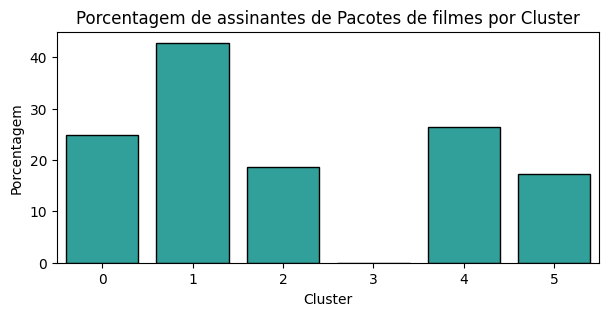

In [ ]:
# Porcentagem de assinantes de Pacotes de filmes por cluster
plt.figure(figsize=(7, 3))
sns.barplot(x=porc_movie_subscribers.index, y=porc_movie_subscribers.values, color = '#20B2AA', edgecolor = 'k')
plt.xlabel('Cluster')
plt.ylabel('Porcentagem')
plt.title('Porcentagem de assinantes de Pacotes de filmes por Cluster')
plt.show()

## Padrões em cada cluster:
- Cluster 1: Este grupo possui o maior percentual de assinantes de pacotes de filmes. Manter e fidelizar esses clientes com benefícios exclusivos, como acesso antecipado a novos lançamentos ou descontos em eventos especiais, pode ser uma abordagem eficaz para a retenção desse perfil.

- Cluster 3: Este grupo continua sem adesão a serviços adicionais. É necessário investigar os motivos da baixa adesão, que podem incluir barreiras econômicas. Oferecer descontos pode ser uma boa estratégia para reter esses clientes.

- Clusters 0, 2, 4 e 5: É necessário analisar mais a fundo esses clusters mistos para entender o comportamento dos assinantes versus não-assinantes dentro de cada cluster.

# Coluna 'subscription_age'.


In [ ]:
#Estatísticas para coluna 'subscription_age'
df_churn_cluster_cleaned.groupby('cluster')['subscription_age'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,12895.0,1.894907,1.258129,0.00,0.92,1.92,2.500,5.88
1,1587.0,1.301997,1.232246,0.00,0.45,0.86,1.975,5.86
2,6707.0,2.273744,1.416899,0.01,1.10,1.98,3.200,5.88
3,7469.0,1.862494,1.284554,0.00,0.87,1.74,2.530,5.87
4,2177.0,2.473978,1.229816,0.19,1.65,2.29,3.220,5.87
5,1469.0,2.014248,1.372779,0.03,0.85,1.97,2.810,5.86


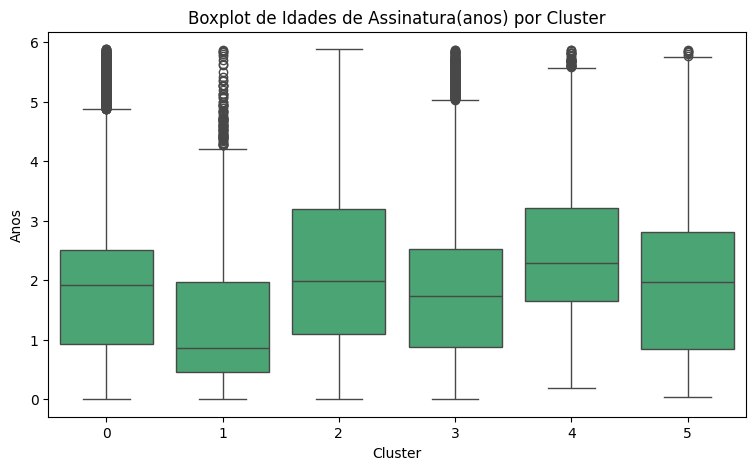

In [ ]:
plt.figure(figsize=(9, 5))
sns.boxplot(x='cluster', y='subscription_age', data=df_churn_cluster_cleaned, color = '#3CB371')
plt.title('Boxplot de Idades de Assinatura(anos) por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Anos')
plt.show()

## Padrões em cada cluster:
- Cluster 1: Este grupo tem a menor mediana de idade de assinatura (0,86 anos), indicando que os usuários tendem a ser novos assinantes. Uma boa estratégia pode ser oferecer descontos iniciais para incentivar a renovação da assinatura.
- Cluster 4: Este grupo tem a maior mediana de idade de assinatura (2,29 anos), sugerindo que os usuários são assinantes mais antigos. Uma alternativa eficaz para a retenção pode envolver o desenvolvimento de um programa de recompensas de fidelidade com benefícios crescentes ao longo do tempo.
- Clusters 0, 2, 3 e 5: É necessário analisar mais a fundo esses clusters mistos para entender o comportamento de cada usuário.

# Coluna 'bill_avg'

In [ ]:
#Estatísticas para coluna 'bill_avg'
df_churn_cluster_cleaned.groupby('cluster')['bill_avg'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,12895.0,16.711516,8.061040,0.0,13.0,19.0,22.0,38.0
1,1587.0,15.416509,7.474618,0.0,12.0,16.0,21.0,37.0
2,6707.0,20.642463,6.921060,0.0,16.0,21.0,24.0,38.0
3,7469.0,16.278752,8.615916,0.0,13.0,19.0,22.0,38.0
4,2177.0,2.019752,4.798138,0.0,0.0,0.0,0.0,32.0
5,1469.0,19.353302,7.269605,0.0,16.0,21.0,23.0,38.0


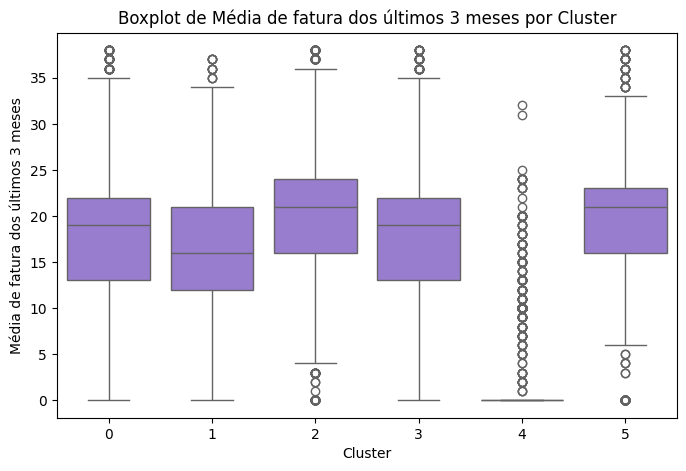

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='cluster', y='bill_avg', data=df_churn_cluster_cleaned, color = '#9370DB')
plt.title('Boxplot de Média de fatura dos últimos 3 meses por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Média de fatura dos últimos 3 meses')
plt.show()

## Padrões em cada cluster:
- Cluster 2: Este grupo tem a mediana de fatura mais alta (21,0). Esses usuários provavelmente consomem mais serviços ou pacotes premium. Oferecer descontos exclusivos pode ser uma abordagem eficaz para a retenção desses clientes.
- Cluster 4: Este grupo tem a menor mediana de fatura (0,0) e apresenta muitos outliers. Esses usuários também são os clientes com maior tempo de contrato. Para a retenção desses clientes, uma boa estratégia pode ser a implementação de um programa de fidelidade que reconheça e recompense pelo tempo de contrato, além de oferecer descontos em serviços adicionais, acesso a conteúdos exclusivos e bônus por renovação de contrato.
- Clusters 0, 1, 3 e 5: Esses clusters têm uma mediana de fatura relativamente próxima, variando entre 16,0 e 21,0. É necessário analisar mais a fundo esses clusters mistos para entender o comportamento de cada usuário.

# Coluna 'reamining_contract'

In [ ]:
#Estatísticas para coluna 'reamining_contract'
df_churn_cluster_cleaned.groupby('cluster')['reamining_contract'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,12895.0,0.007873,0.060951,0.00,0.00,0.00,0.00,0.81
1,1587.0,1.386812,0.339556,0.59,1.12,1.42,1.64,2.31
2,6707.0,0.021618,0.109543,0.00,0.00,0.00,0.00,1.15
3,7469.0,0.008570,0.073119,0.00,0.00,0.00,0.00,0.94
4,2177.0,0.027391,0.157837,0.00,0.00,0.00,0.00,1.53
5,1469.0,0.029312,0.173894,0.00,0.00,0.00,0.00,1.62


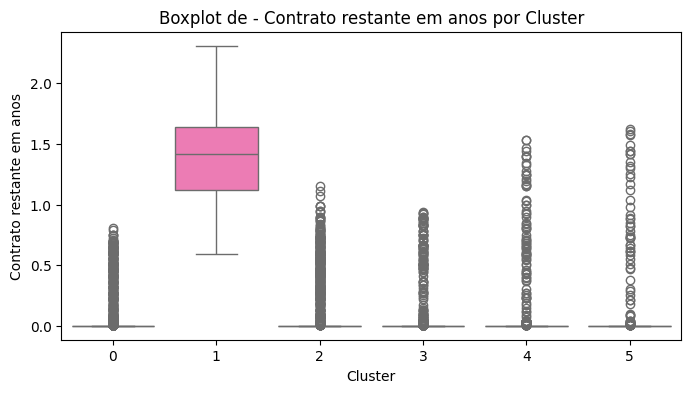

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='cluster', y='reamining_contract', data=df_churn_cluster_cleaned, color = '#FF69B4')
plt.title('Boxplot de - Contrato restante em anos por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contrato restante em anos')
plt.show()

## Padrões em cada cluster:
- Cluster 1: Usuários com maior tempo de contrato restante e menor tempo de assinatura. Podemos propor ofertas de renovação antes do término do contrato, garantindo benefícios adicionais para incentivar a continuidade.
- Clusters 0, 2, 3, 4 e 5: Usuários com pouco ou nenhum tempo de contrato restante. Implementar promoções de retenção, como descontos na renovação ou adição de serviços gratuitos por um período, pode ser uma estratégia eficaz para reter esses cliente
# Coluna 'service_failure_count"
- Vamos filtrar para verificar os registros maiores que 1:

In [ ]:
# Contagem de falhas por clusters, ocorrências superiores a 1 falha
failure_counts = df_churn_cluster_cleaned.groupby(['cluster'])['service_failure_count'].apply(lambda x: (x > 1).sum())
pd.DataFrame(failure_counts)

,service_failure_count
cluster,
0,0
1,71
2,178
3,15
4,114
5,1469


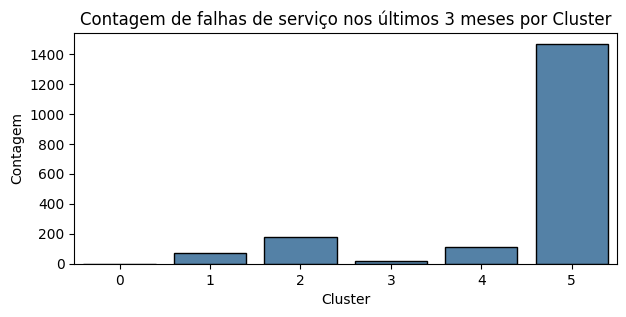

In [ ]:
# Porcentagem de falhas (>1) por Cluster
plt.figure(figsize=(7, 3))
sns.barplot(x=failure_counts.index, y=failure_counts.values, color = '#4682B4', edgecolor = 'k')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.title('Contagem de falhas de serviço nos últimos 3 meses por Cluster')
plt.show()

## Padrões em cada cluster:
- Cluster 0: Sem falhas de serviço registradas. Para esses clientes, é crucial manter a alta qualidade do serviço e verificar outras variáveis que possam estar impactando o cancelamento.
- Cluster 5: Com 1469 falhas registradas, é necessário realizar uma intervenção para identificar e corrigir essas falhas.
- Clusters 1, 2, 3 e 4: É necessário analisar mais a fundo esses clusters mistos para entender o comportamento de cada usuário.

# Colunas 'download_avg' e 'upload_avg'

In [ ]:
# Estatísticas descritivas para a coluna 'download_avg'
download_stats = df_churn_cluster_cleaned.groupby('cluster')['download_avg'].describe()
# Estatísticas descritivas para a coluna 'upload_avg'
upload_stats = df_churn_cluster_cleaned.groupby('cluster')['upload_avg'].describe()

pd.DataFrame(pd.concat([download_stats, upload_stats], axis=1, keys=['Download Avg', 'Upload Avg']))

Download Avg                                                      \
               count       mean        std  min   25%   50%    75%   max   
cluster                                                                    
0             1467.0  14.767007  16.541861  0.0   0.0  10.3  23.85  83.4   
1             7470.0   5.536827   8.443601  0.0   0.0   0.0   9.30  45.7   
2            12899.0   7.675246   8.526028  0.0   0.0   4.8  13.20  42.6   
3             1586.0  22.105990  22.374145  0.0   0.0  18.5  37.70  84.5   
4             2180.0   2.907752   5.560701  0.0   0.0   0.0   3.60  63.5   
5             6702.0  42.353924  16.512145  2.1  30.0  40.3  53.30  84.7   

        Upload Avg                                               
             count      mean       std  min  25%  50%  75%  max  
cluster                                                          
0           1467.0  1.087457  1.196912  0.0  0.0  0.8  1.8  5.5  
1           7470.0  0.436104  0.668113  0.0  0.0  0.0  0.7  4.1  
2          12899.0  0.554369  0.614980  0.0  0.0  0.4  1.0  3.5  
3           1586.0  1.552711  1.537886  0.0  0.0  1.3  2.7  5.5  
4           2180.0  0.292339  0.565784  0.0  0.0  0.0  0.4  5.5  
5           6702.0  3.125395  1.106679  0.7  2.2  3.0  3.9  5.5

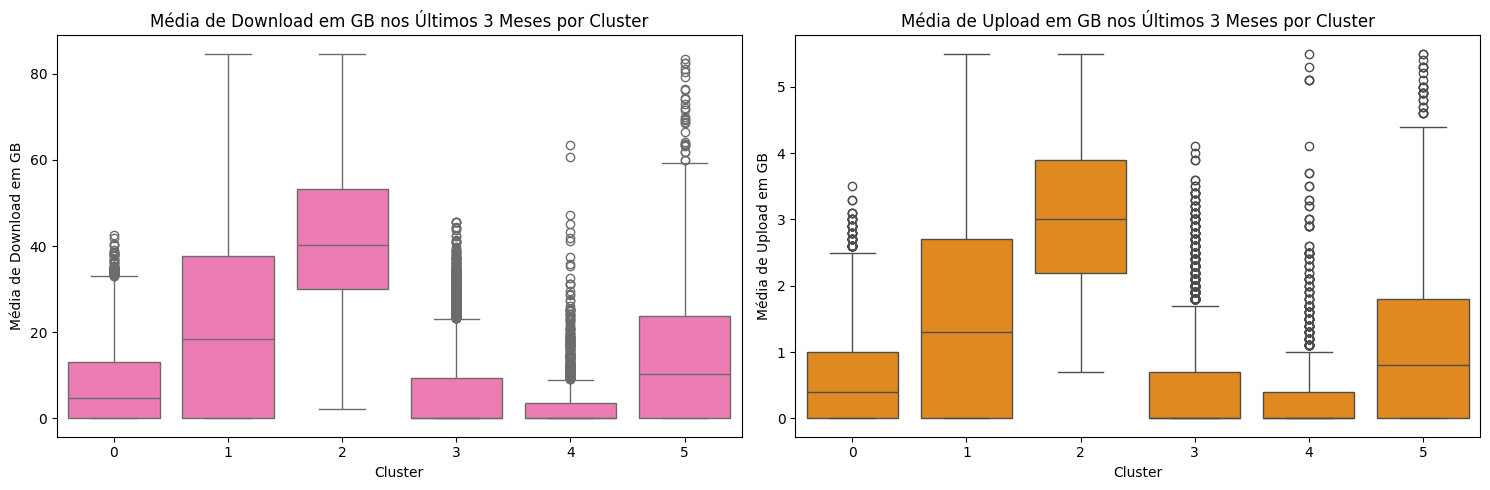

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot para 'download_avg'
sns.boxplot(ax=axes[0], x='cluster', y='download_avg', data=df_churn_cluster_cleaned, color='#FF69B4')
axes[0].set_title('Média de Download em GB nos Últimos 3 Meses por Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Média de Download em GB')

# Boxplot para 'upload_avg'
sns.boxplot(ax=axes[1], x='cluster', y='upload_avg', data=df_churn_cluster_cleaned, color='#FF8C00')
axes[1].set_title('Média de Upload em GB nos Últimos 3 Meses por Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Média de Upload em GB')

plt.tight_layout()
plt.show()

## Padrões em cada cluster:
- Cluster 2: Este cluster apresenta a maior média de download e upload.
- Cluster 4: Este cluster tem a menor média de download e upload.
- Cluster 1: O Cluster 1 apresenta uma alta variabilidade tanto no download quanto no upload. Isso é evidenciado pelo desvio padrão relativamente alto e a ampla faixa de valores.
- Clusters 3, 4 e 5: É necessário analisar mais a fundo esses clusters mistos para entender o comportamento de cada usuário.

## Coluna 'download_over_limit'

In [ ]:
# Contagem de Downloads acima do limite
download_over_limit_counts = df_churn_cluster_cleaned.groupby(['cluster'])['download_over_limit'].apply(lambda x: (x > 1).sum())
pd.DataFrame(download_over_limit_counts)

,download_over_limit
cluster,
0,224
1,55
2,31
3,177
4,2177
5,57


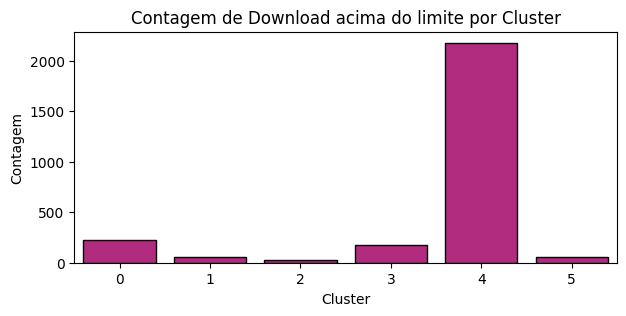

In [ ]:
# Porcentagem de falhas (>1) por Cluster
plt.figure(figsize=(7, 3))
sns.barplot(x=download_over_limit_counts.index, y=download_over_limit_counts.values, color = '#C71585', edgecolor = 'k')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.title('Contagem de Download acima do limite por Cluster')
plt.show()

## Padrões em cada cluster:
- Cluster 4: Com 2177 ocorrências de downloads acima do limite, este é o grupo com o maior número de incidentes. Esses clientes também possuem a menor fatura e o maior tempo de contrato. É provável que seus pacotes incluam limites que não atendem aos padrões atuais de velocidade e uso de dados, o que explica o alto número de ocorrências. Revisar e atualizar os pacotes oferecidos a esses clientes para garantir que atendam às necessidades de uso de dados atuais, mantendo descontos atrativos, pode ser uma abordagem eficaz para a retenção.
- Clusters 0, 1, 2, 3 e 5: É necessário analisar mais a fundo esses clusters mistos para entender o comportamento de cada usuário.
---
# Conclusões por Cluster (percepções mais evidentes):
- **Cluster 0:** Este grupo é composto por usuários que assinam o serviço de TV. Não há falhas de serviço registradas para esses clientes;
- **Cluster 1:**  Os usuários deste cluster assinam pacotes de filmes. Eles têm o menor tempo de assinatura de contrato, mas o maior tempo de assinatura restante. Isso sugere que são novos assinantes que ainda têm um longo período contratual pela frente. Além de  apresentarem uma alta variabilidade tanto no download quanto no upload.
- **Cluster 2:** Este cluster inclui usuários que assinam o serviço de TV e possuem a maior mediana de fatura, além das maiores médias de upload e download. O valor da fatura provavelmente é ocasionada pelas características de uso do serviço;
- **Cluster 3:** Este grupo é composto por usuários que não assinam TV nem pacotes de filmes.
- **Cluster 4:**  Os usuários deste cluster têm o maior tempo de contrato e a menor mediana de fatura. No entanto, eles apresentam o maior número de ocorrências de download acima do limite e as menores médias de upload e download. Isso sugere que seus pacotes de serviços podem estar desatualizados em relação às suas necessidades atuais.
- **Cluster 5:** Este cluster registra 1469 falhas de serviço, o maior número entre todos os clusters.

## Com base nas percepções obtidas, é possível desenvolver estratégias de marketing e personalizadas, visando a retenção de clientes. Essas estratégias devem ser adaptadas aos diferentes perfis de uso de serviços de cada cluster, levando em consideração as necessidades específicas e comportamentos de cada grupo.